In [45]:
import numpy as np
import pandas as pd
import sympy as sp
from matplotlib import pyplot as plt

In [46]:
csv_file_name = 'sunday_1hz.csv'
skip_lines = 8
mat_data = np.genfromtxt(csv_file_name, delimiter=',',skip_header=skip_lines) # takes around 13s

#1 clean, divide csv into vectors (arrays)
#2 plot cleaned vectors

In [47]:
mat_data

array([[0.000000e+00, 1.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.000000e+00, 1.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [2.000000e+00, 1.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       ...,
       [3.999997e+06, 1.000000e+00, 0.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 1.000000e+00],
       [3.999998e+06, 1.000000e+00, 0.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 1.000000e+00],
       [3.999999e+06, 0.000000e+00, 1.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 1.000000e+00]])

In [48]:
mat_u8_data = mat_data[:,1:].astype(np.uint8)
timer = mat_u8_data[:,0:8]
reset_signal = mat_u8_data[:,8]
comparator_output = mat_u8_data[:,9]

In [49]:
diff = np.diff(comparator_output)
rising_edge_indexes = np.where(diff == 1)[0]


In [50]:
timer_filtered = timer[rising_edge_indexes]

In [51]:
timer_filtered

array([[0, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

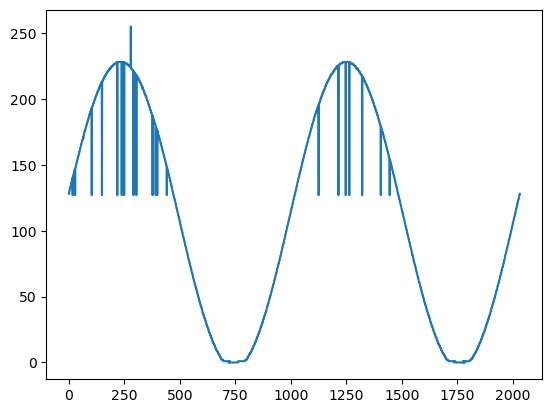

In [52]:
timer_filtered
bin_to_dec_vect = np.array([1, 2, 4, 8, 16, 32, 64, 128])
result = np.sum(timer_filtered * bin_to_dec_vect, axis=1) #sum along hor axis
plt.plot(result)